In [54]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

val_dir = r"C:\Users\Jens\Documents\Code\BactUnet\_results\network_compare\validation"
train_dir = r"C:\Users\Jens\Documents\Code\BactUnet\_results\network_compare\training"

def read_data(path, label):
    out = pd.DataFrame()
    #out_count = pd.DataFrame()
    with os.scandir(path) as it:
        for entry in it:
            if entry.name.endswith('TP.csv'):
                name = entry.name.split("_")
                fname = name[0]+"_"+name[1]
                network = name[2]
                
                tp_df = pd.read_csv(entry.path)
                gt_df = pd.read_csv(path+"\\"+fname+"_GT_count.csv")
                count_df = pd.read_csv(path+"\\"+fname+"_"+network+"_count.csv")
                frames = np.array(count_df.index) + int(name[1])
                count_df['frame'] =  frames
                count_df['file'] = fname
                count_df['network'] = network
                count_df['dataset'] = label
                count_df["TP"] = tp_df["Count"]
                count_df["GT"] = gt_df["Count"]
                count_df["FP"] = count_df["Count"] - count_df["TP"]
                count_df["FN"] = count_df["GT"] - count_df["TP"]
                count_df['precision'] = count_df['TP']/(count_df['TP']+count_df['FP'])
                count_df['recall'] = count_df['TP']/(count_df['TP']+count_df['FN'])
                count_df['average_precision'] = count_df['TP']/(count_df['TP']+count_df['FP']+count_df['FN'])
                
                #if counttype == 'TP':
                #    out_TP = pd.concat([out_TP, df], ignore_index=True)
                #else:
                #    out_count = pd.concat([out_count, df], ignore_index=True)
                out = pd.concat([out, count_df], ignore_index=True)
        return out 

alldata = pd.concat([read_data(val_dir, "validation"), read_data(train_dir, "train")], ignore_index=True)
print(alldata.head(), alldata.shape)

                      Slice  Count  Total Area  Average Size  %Area  Mean  \
0  BT0407_110_0000_cp_masks     35        8108       231.657  0.153   255   
1  BT0407_110_0001_cp_masks     35        7763       221.800  0.146   255   
2  BT0407_110_0002_cp_masks     25        4709       188.360  0.089   255   
3  BT0407_110_0003_cp_masks     24        4509       187.875  0.085   255   
4  BT0407_110_0004_cp_masks     29        5918       204.069  0.111   255   

   frame        file network     dataset  TP  GT  FP  FN  precision    recall  \
0    110  BT0407_110     CP2  validation  16  25  19   9   0.457143  0.640000   
1    111  BT0407_110     CP2  validation  17  28  18  11   0.485714  0.607143   
2    112  BT0407_110     CP2  validation  18  36   7  18   0.720000  0.500000   
3    113  BT0407_110     CP2  validation  19  37   5  18   0.791667  0.513514   
4    114  BT0407_110     CP2  validation  20  41   9  21   0.689655  0.487805   

   average_precision  
0           0.363636  
1   

In [55]:
df = alldata.filter(items=['Count', 'Average Size','frame','file', 'network', 'dataset', 'TP', 'GT', 'FP','FN', 'precision', 'recall', 'average_precision'])
df.head()

,Count,Average Size,frame,file,network,dataset,TP,GT,FP,FN,precision,recall,average_precision
0,35,231.657,110,BT0407_110,CP2,validation,16,25,19,9,0.457143,0.640000,0.363636
1,35,221.800,111,BT0407_110,CP2,validation,17,28,18,11,0.485714,0.607143,0.369565
2,25,188.360,112,BT0407_110,CP2,validation,18,36,7,18,0.720000,0.500000,0.418605
3,24,187.875,113,BT0407_110,CP2,validation,19,37,5,18,0.791667,0.513514,0.452381
4,29,204.069,114,BT0407_110,CP2,validation,20,41,9,21,0.689655,0.487805,0.400000


In [56]:
print(df.network.unique())
print(df.dataset.unique())
print(df.file.unique())



['CP2' 'CP' 'empty' 'single' 'three']
['validation' 'train']
['BT0407_110' 'BT353_001' 'BT403_229' 'BT0398_210' 'BT402_169' 'BT403_002'
 'BT404_199']


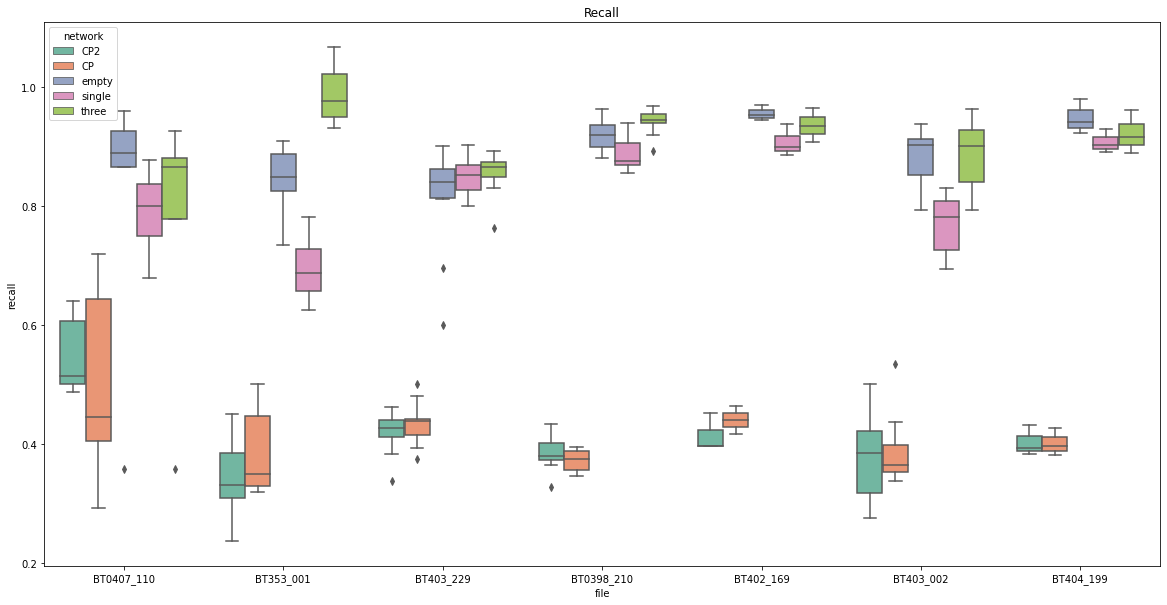

In [67]:
plt.figure(figsize=(20,10))
#g1 = sns.boxplot(data=df, x='file', y='average_precision', hue='network')
#g2 = sns.boxplot(data=df, x='file', y='TP', hue='network')
g3 = sns.boxplot(data=df, x='file', y='recall', hue='network', palette='Set2').set(title='Recall')


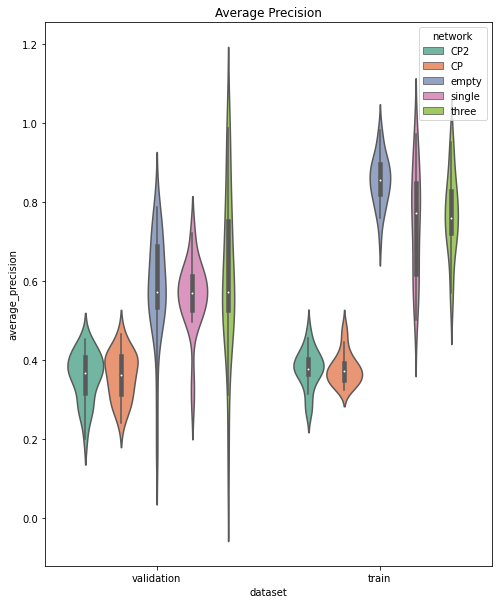

In [86]:
plt.figure(figsize=(8,10))
g3 = sns.violinplot(data=df, x='dataset', y='average_precision', hue='network', palette="Set2").set(title='Average Precision')

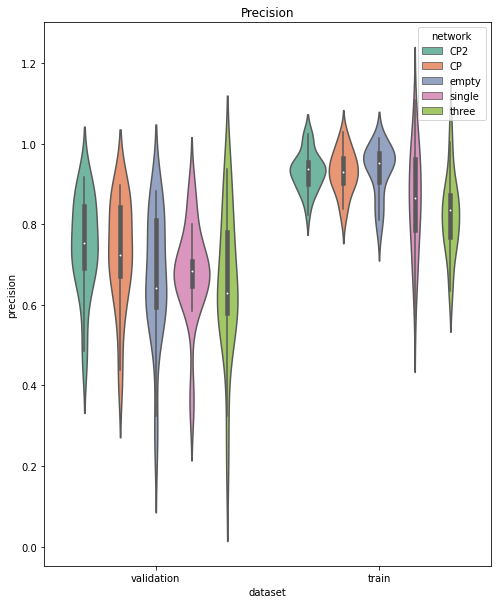

In [85]:
plt.figure(figsize=(8,10))
g3 = sns.violinplot(data=df, x='dataset',hue='network', y='precision', palette="Set2").set(title='Precision')



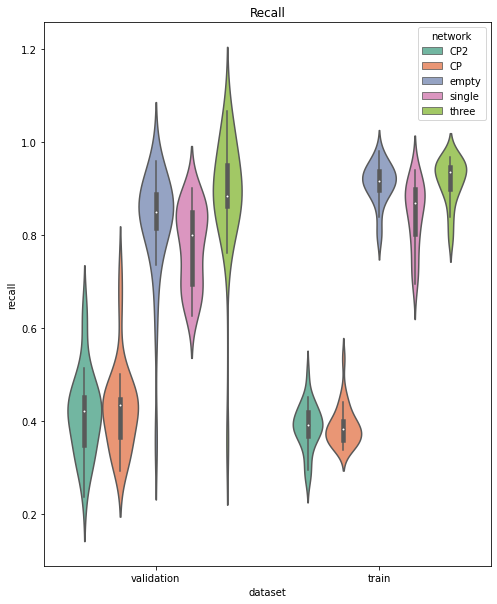

In [87]:
plt.figure(figsize=(8,10))
g3 = sns.violinplot(data=df, x='dataset',hue='network', y='recall', palette="Set2").set(title='Recall')


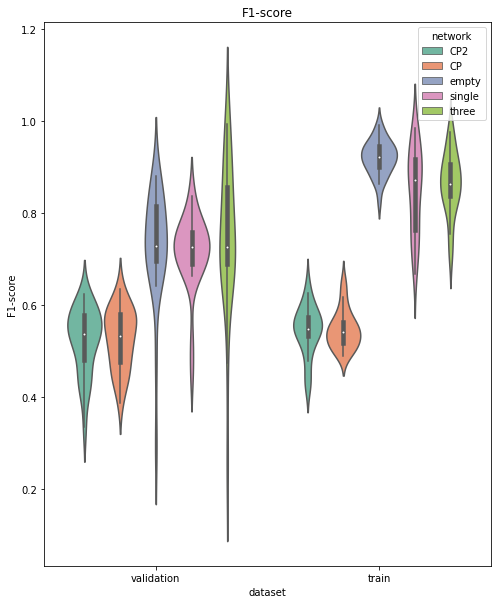

In [88]:
df['F1-score'] = 2*df['precision']*df['recall']/(df['precision']+df['recall'])

plt.figure(figsize=(8,10))
g3 = sns.violinplot(data=df, x='dataset',hue='network', y='F1-score', palette="Set2").set(title='F1-score')


In [10]:
count_compare = {}
threshold = 0.5 

def countmask(mask):
    #counts contours in binary 3D-array
    out=[]
    for frame in range(len(mask)):
        out.append(len(measure.find_contours(mask[frame])))
    return out
    
    
for stack in image_dict.keys():
    count_compare[stack] = {}
    mask_true = image_dict[stack]['y_true']>1
    mask_single = image_dict[stack]["y_pred_single"][:,0,:,:]>threshold
    mask_3frame = image_dict[stack]["y_pred_3frame"][:,0,:,:]>threshold
    mask_empty = image_dict[stack]["y_pred_empty"][:,0,:,:]>threshold
    
    and_single = np.logical_and(mask_true, mask_single)
    and_3frame = np.logical_and(mask_true, mask_3frame)
    and_empty = np.logical_and(mask_true, mask_empty)
    
    single_and_3frame = np.logical_and(mask_single, mask_single)
     
    count_compare[stack]['frame'] = list(range(len(mask_true)))
    count_compare[stack]['true'] = countmask(mask_true)
    count_compare[stack]['single'] = countmask(mask_single)
    count_compare[stack]['3frame'] = countmask(mask_3frame)
    count_compare[stack]['empty'] = countmask(mask_empty)
    count_compare[stack]['true_and_single'] = countmask(and_single)
    count_compare[stack]['true_and_3frame'] = countmask(and_3frame)
    count_compare[stack]['true_and_empty'] = countmask(and_empty)
    count_compare[stack]['3frame_and_single'] = countmask(single_and_3frame)




In [64]:
count_df = None
#print(count_compare)
for stack in count_compare.keys():
    df = pd.DataFrame.from_dict(count_compare[stack])
    df['file'] = stack
    
    
    if count_df is None:
        count_df = df
    
    else:
        count_df = pd.concat([count_df, df], ignore_index=True)
count_df.head()

NameError: name 'count_compare' is not defined

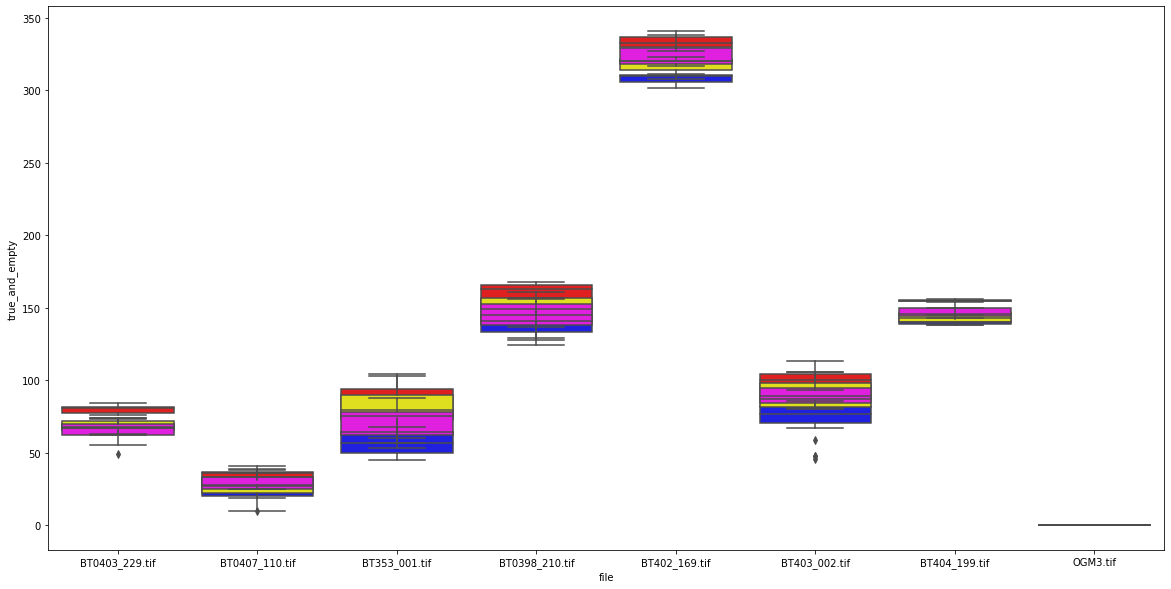

In [12]:

g1 = sns.boxplot(data=count_df, x='file', y='true_and_single', color='blue')
g1 = sns.boxplot(data=count_df, x='file', y='true_and_3frame', color='yellow')
g1 = sns.boxplot(data=count_df, x='file', y='true_and_empty', color='magenta')

In [13]:
count_df['TP_fraction_single'] = count_df['true_and_single']/count_df['true']
count_df['TP_fraction_3frame'] = count_df['true_and_3frame']/count_df['true']
count_df['TP_fraction_empty'] = count_df['true_and_empty']/count_df['true']

count_df['FP_fraction_single'] = (count_df['single']-count_df['true_and_single'])/count_df['single']
count_df['FP_fraction_3frame'] = (count_df['3frame']-count_df['true_and_3frame'])/count_df['3frame']
count_df['FP_fraction_empty'] = (count_df['empty']-count_df['true_and_empty'])/count_df['empty']
count_df.head()


,frame,true,single,3frame,empty,true_and_single,true_and_3frame,true_and_empty,3frame_and_single,file,TP_fraction_single,TP_fraction_3frame,TP_fraction_empty,FP_fraction_single,FP_fraction_3frame,FP_fraction_empty
0,0,81,96,111,79,65,72,67,96,BT0403_229.tif,0.802469,0.888889,0.827160,0.322917,0.351351,0.151899
1,1,76,102,126,106,63,65,63,102,BT0403_229.tif,0.828947,0.855263,0.828947,0.382353,0.484127,0.405660
2,2,77,102,135,118,68,64,67,102,BT0403_229.tif,0.883117,0.831169,0.870130,0.333333,0.525926,0.432203
3,3,78,114,130,120,70,68,70,114,BT0403_229.tif,0.897436,0.871795,0.897436,0.385965,0.476923,0.416667
4,4,82,119,123,108,74,74,70,119,BT0403_229.tif,0.902439,0.902439,0.853659,0.378151,0.398374,0.351852


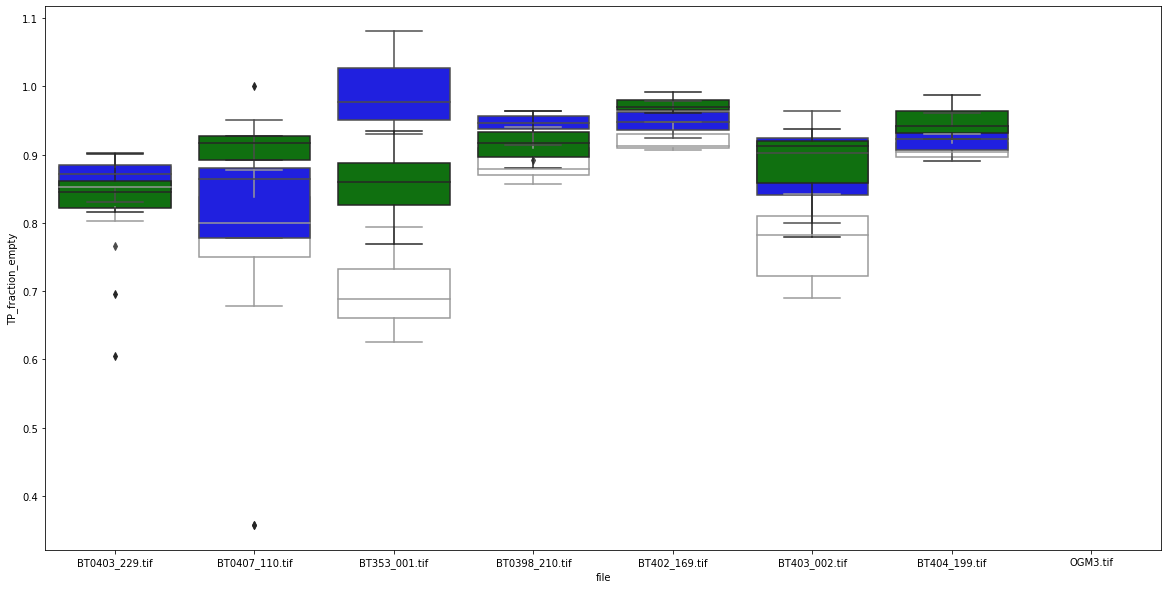

In [14]:
plt.figure(figsize=(20,10))
g1 = sns.boxplot(data=count_df, x='file', y='TP_fraction_single', color='white')
g1 = sns.boxplot(data=count_df, x='file', y='TP_fraction_3frame', color='blue')
g1 = sns.boxplot(data=count_df, x='file', y='TP_fraction_empty', color='green')





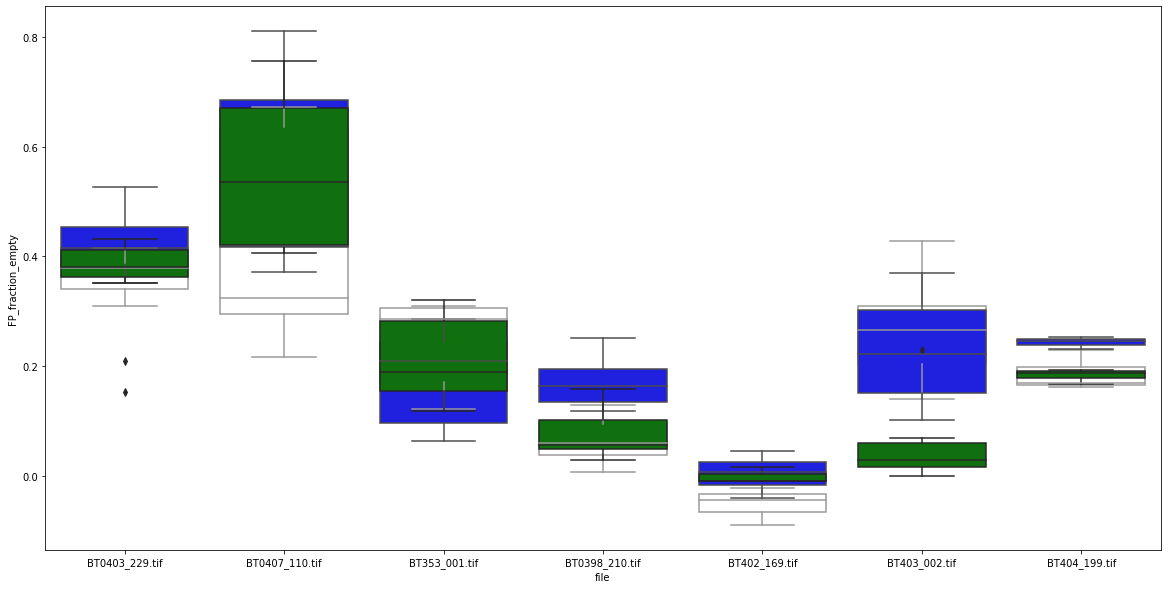

In [33]:
plt.figure(figsize=(20,10))
g2 = sns.boxplot(data=count_df, x='file', y='FP_fraction_single', color='white')
g2 = sns.boxplot(data=count_df, x='file', y='FP_fraction_3frame', color='blue')
g2 = sns.boxplot(data=count_df, x='file', y='FP_fraction_empty', color='green')

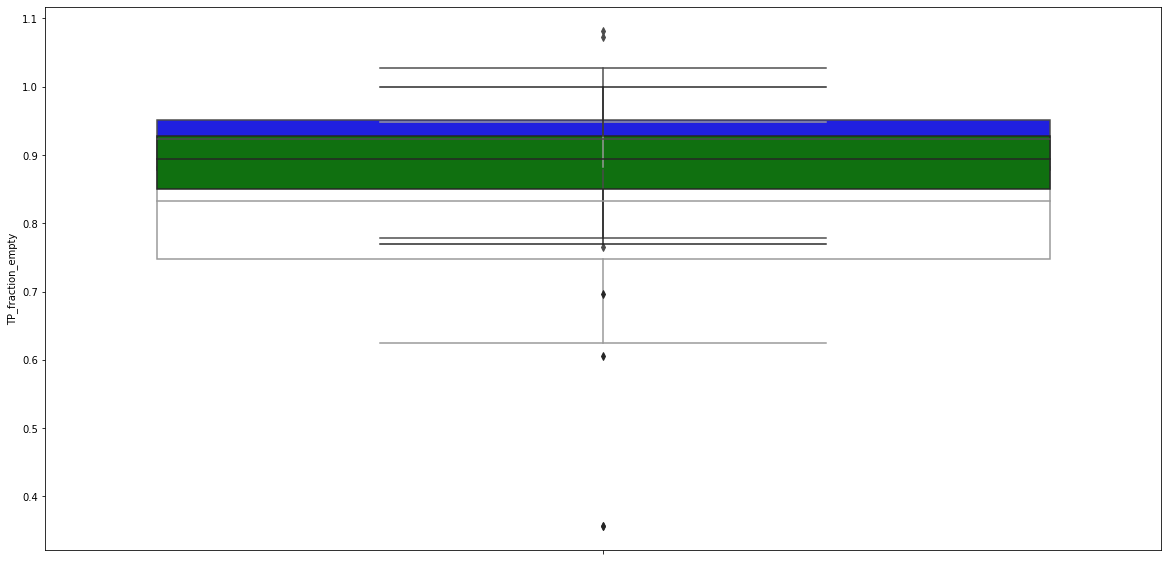

In [34]:
plt.figure(figsize=(20,10))
g1 = sns.boxplot(data=count_df, y='TP_fraction_single', color='white')
g1 = sns.boxplot(data=count_df, y='TP_fraction_3frame', color='blue')
g1 = sns.boxplot(data=count_df, y='TP_fraction_empty', color='green')


Let's reformat the dataframe for easier plottting

In [35]:
count_df.head()

,frame,true,single,3frame,empty,true_and_single,true_and_3frame,true_and_empty,3frame_and_single,file,TP_fraction_single,TP_fraction_3frame,TP_fraction_empty,FP_fraction_single,FP_fraction_3frame,FP_fraction_emty,FP_fraction_empty
0,0,81,96,111,79,65,72,67,96,BT0403_229.tif,0.802469,0.888889,0.827160,0.322917,0.351351,0.151899,0.151899
1,1,76,102,126,106,63,65,63,102,BT0403_229.tif,0.828947,0.855263,0.828947,0.382353,0.484127,0.405660,0.405660
2,2,77,102,135,118,68,64,67,102,BT0403_229.tif,0.883117,0.831169,0.870130,0.333333,0.525926,0.432203,0.432203
3,3,78,114,130,120,70,68,70,114,BT0403_229.tif,0.897436,0.871795,0.897436,0.385965,0.476923,0.416667,0.416667
4,4,82,119,123,108,74,74,70,119,BT0403_229.tif,0.902439,0.902439,0.853659,0.378151,0.398374,0.351852,0.351852


In [36]:
single = count_df.filter(items=['file', 'frame'])
single['model'] = 'single_frame'
single['TP'] = count_df['true_and_single']
single['FN'] = count_df['true']-count_df['true_and_single']
single['FP'] = count_df['single']-count_df['true_and_single']

multi = count_df.filter(items=['file', 'frame'])
multi['model'] = '3_frame'
multi['TP'] = count_df['true_and_3frame']
multi['FN'] = count_df['true']-count_df['true_and_3frame']
multi['FP'] = count_df['3frame']-count_df['true_and_3frame']

empty = count_df.filter(items=['file', 'frame'])
empty['model'] = 'empty'
empty['TP'] = count_df['true_and_empty']
empty['FN'] = count_df['true']-count_df['true_and_empty']
empty['FP'] = count_df['empty']-count_df['true_and_empty']

tp_df = pd.concat([single, multi, empty], ignore_index=True)



tp_df.head()
tp_df.to_csv('single_3frame_empty_count.csv') 

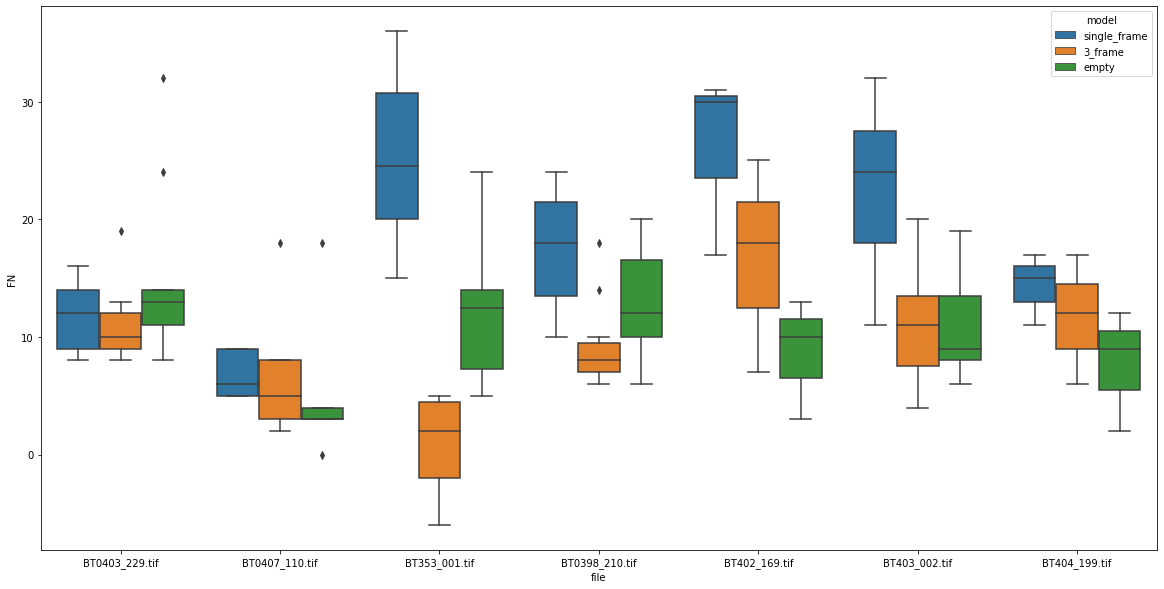

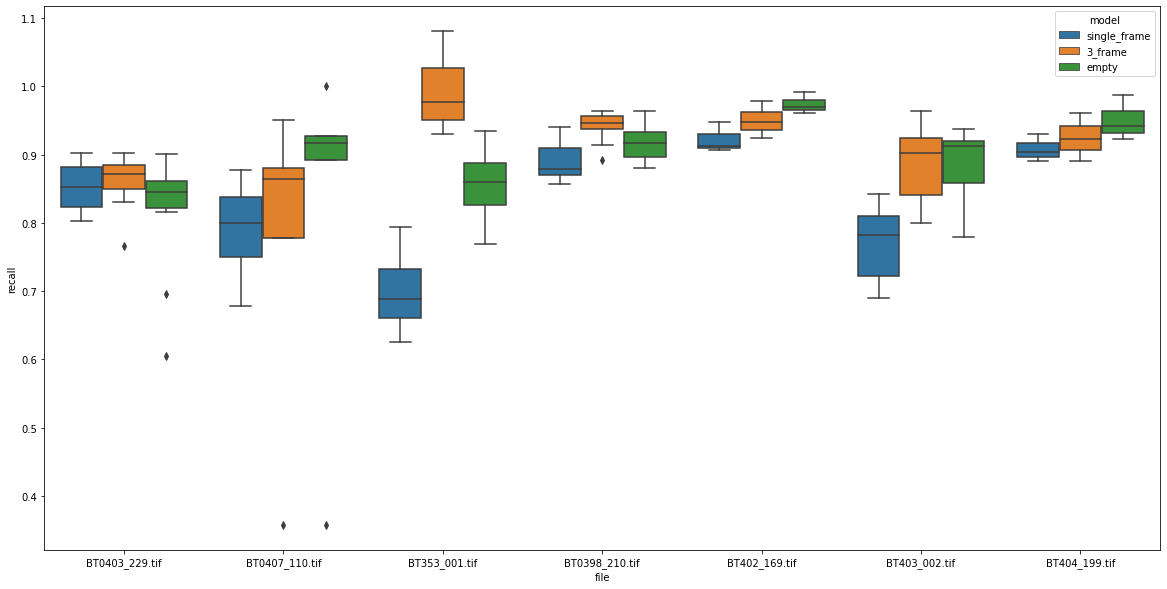

In [38]:
plt.figure(figsize=(20,10))
g3 = sns.boxplot(data=tp_df, x='file', y='recall', hue='model')

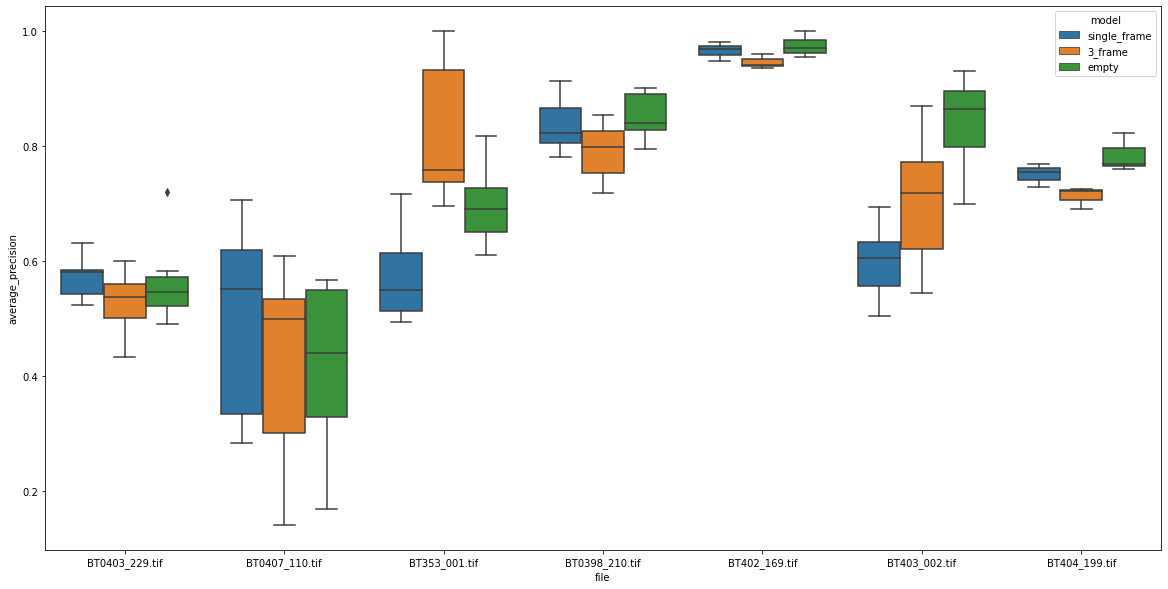

In [39]:
plt.figure(figsize=(20,10))
g3 = sns.boxplot(data=tp_df, x='file', y='average_precision', hue='model')

In [63]:
plt.figure(figsize=(5,10))
g3 = sns.violinplot(data=tp_df, x='model', y='FN')

NameError: name 'tp_df' is not defined

<Figure size 360x720 with 0 Axes>

In [59]:
tp_df['F1-score'] = 2*tp_df['precision']*tp_df['recall']/(tp_df['precision']+tp_df['recall'])

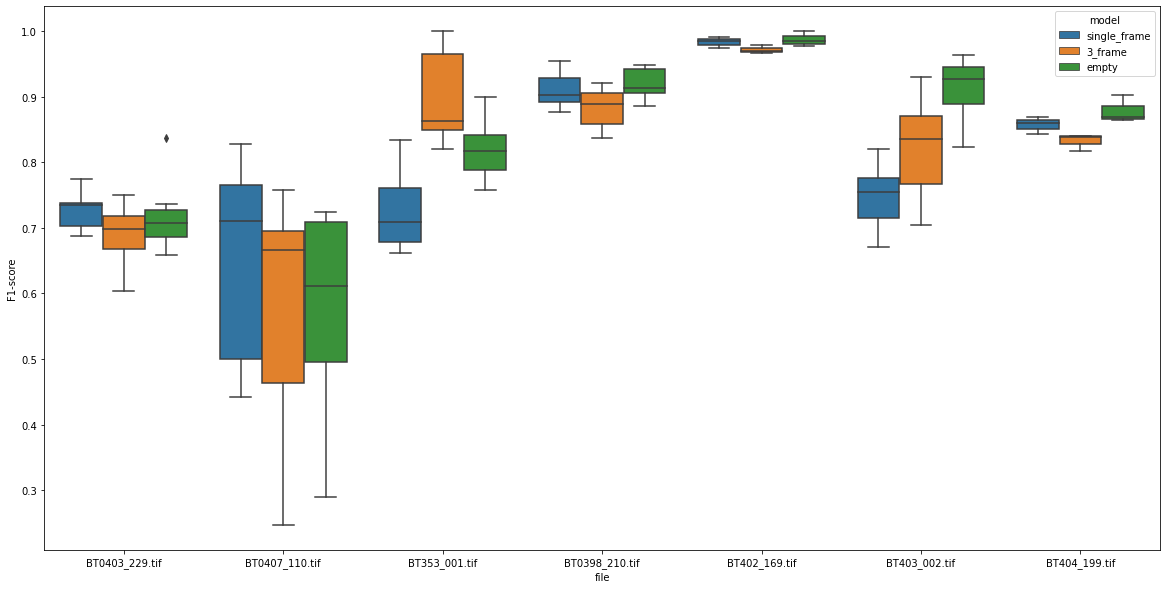

In [62]:
plt.figure(figsize=(20,10))
g3 = sns.boxplot(data=tp_df, x='file', y='F1-score', hue='model')

In [70]:
keras.backend.clear_session()
stride = 2

# #IOU
for stack in ogm3_data.keys():
    y_pred1 = None
    y_pred2 = None
    y_pred3 = None
    
    img_stack = ogm3_data[stack]
    for i in range(0, len(img_stack["image_patch"]), stride):
        pred_si = model_single.predict(np.expand_dims(img_stack["image_patch"][i:i+stride,1,:,:], axis=1))
        pred_3f = model_3frame.predict(img_stack["image_patch"][i:i+stride])
        pred_empt = model_empty.predict(img_stack["image_patch"][i:i+stride])
        if y_pred1 is not None:
            y_pred1 = np.concatenate((y_pred1, pred_si))
            y_pred2 = np.concatenate((y_pred2, pred_3f))
            y_pred3 = np.concatenate((y_pred3, pred_empt))

        if y_pred1 is None:
            y_pred1 = pred_si
            y_pred2 = pred_3f
            y_pred3 = pred_empt
    
    ogm3_data[stack]["y_pred_single"] = unpatch_stack(y_pred1, 8, 8, 1)
    ogm3_data[stack]["y_pred_3frame"] = unpatch_stack(y_pred2, 8, 8, 1)
    ogm3_data[stack]["y_pred_empty"] = unpatch_stack(y_pred3, 8, 8, 1)
    print(stack, ogm3_data[stack]["y_pred_single"].shape, ogm3_data[stack]["y_pred_3frame"].shape, ogm3_data[stack]["y_pred_empty"].shape)
    

OGM3 (24, 1, 2304, 2304) (24, 1, 2304, 2304) (24, 1, 2304, 2304)


In [71]:
threshold = 0.5

for stack in ogm3_data.keys():
    pred_si = (ogm3_data[stack]["y_pred_single"]>threshold)*255
    pred_3f = (ogm3_data[stack]["y_pred_3frame"]>threshold)*255
    pred_empty = (ogm3_data[stack]["y_pred_empty"]>threshold)*255
    
    saveme = np.concatenate((np.expand_dims(ogm3_data[stack]["y_true"],axis=1), pred_si, pred_3f, pred_empty), axis=1)
    saveme = saveme.astype('uint8')
    prefix="V4_compare"
    dic = unpatch_stack(ogm3_data[stack]["image_patch"], 8, 8, 3)
    dic = dic[:,1,:,:] * 255
    dic = np.expand_dims(dic, axis=1).astype('uint8')
    print(dic.shape, ogm3_data[stack]["image_patch"].max())
    saveme = np.concatenate((dic, saveme), axis=1)
    tiff.imwrite(os.path.join(r"C:\Users\Jens\Documents\Code\BactUnet\Bactnet\Training data\stacks\predict", "OGM3.tif"), saveme, imagej=True,
                      metadata={'unit': 'um', 'finterval': 15,
                                'axes': 'TCYX'})

(24, 1, 2304, 2304) 1.0
